In [13]:
#Weather forescast in Kenya
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap

In [9]:
def plot_nc(t):
    fn = 'ven_wrf.nc'
    ds = nc.Dataset(fn)
    lats = ds.variables['lat'][:]  
    longs = ds.variables['lon'][:]
    rfain1=ds.variables['rainc'][:]
    rfain2=ds.variables['rainnc'][:]
    lons,lat= np.meshgrid(longs,lats)
    mp = Basemap(projection='merc',llcrnrlon=min(longs),llcrnrlat=min(lats),urcrnrlon=max(longs),urcrnrlat=max(lats),resolution='f') 
    x,y = mp(lons,lat)
    #lon, lat = np.meshgrid(longs,lats)
    c_scheme = mp.pcolor(x,y,np.squeeze(((rfain1+rfain2)[t,:,:,:])),cmap = 'ocean')
    mp.drawcoastlines()
    mp.drawstates()
    mp.drawcountries()
    mp.drawcounties()
    mp.readshapefile('County', name='rows', drawbounds=True, linewidth=0.5)
    cbar = mp.colorbar(c_scheme,location='right',pad = '3%', extend='both',label='Precipitation(mm)')

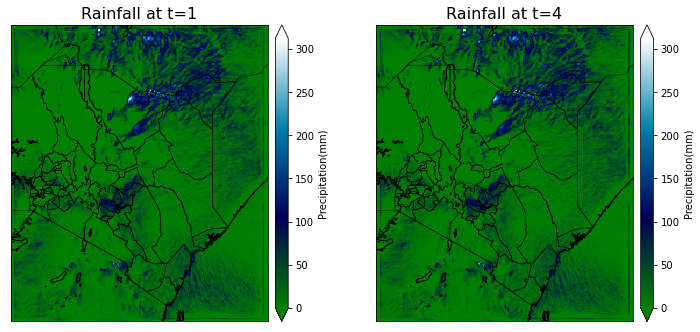

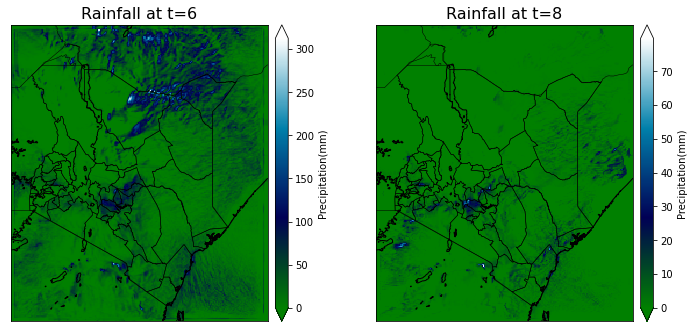

In [12]:
plt.figure(1,figsize=(12,12))
plt.subplot(221)
plot_nc(1)
plt.title('Rainfall at t=1',fontsize=16)

plt.subplot(222)
plot_nc(4)
plt.title('Rainfall at t=4',fontsize=16)
plt.savefig('rainfall1.jpg',dpi=300)

plt.figure(2,figsize=(12,12))
plt.subplot(221)
plot_nc(6)
plt.title('Rainfall at t=6',fontsize=16)

plt.subplot(222)
plot_nc(8)
plt.title('Rainfall at t=8',fontsize=16)

#plt.title("24 hours Rainfall prediction",fontsize=15)
plt.show
plt.savefig('rainfall2.jpg',dpi=300) #saves the image generated




In [4]:
def plot_nc_2(t):
    fn = 'ven_wrf.nc'
    ds = nc.Dataset(fn)
    lats = ds.variables['lat'][:]  
    longs = ds.variables['lon'][:]
    Temperature=ds.variables['t2'][:]
    lons,lat= np.meshgrid(longs,lats)
    mp = Basemap(projection='merc',llcrnrlon=min(longs),llcrnrlat=min(lats),urcrnrlon=max(longs),urcrnrlat=max(lats),resolution='f') 
    x,y = mp(lons,lat)
    #lon, lat = np.meshgrid(longs,lats)
    c_scheme = mp.pcolor(x,y,np.squeeze(((Temperature-273)[t,:,:,:])),cmap = 'rainbow')
    mp.drawcoastlines()
    mp.drawstates()
    mp.drawcountries()
    mp.drawcounties()
    mp.readshapefile('County', name='County', drawbounds=True, linewidth=0.5)
    cbar = mp.colorbar(c_scheme,location='right',pad = '3%', extend='both',label='Temperature(C)')

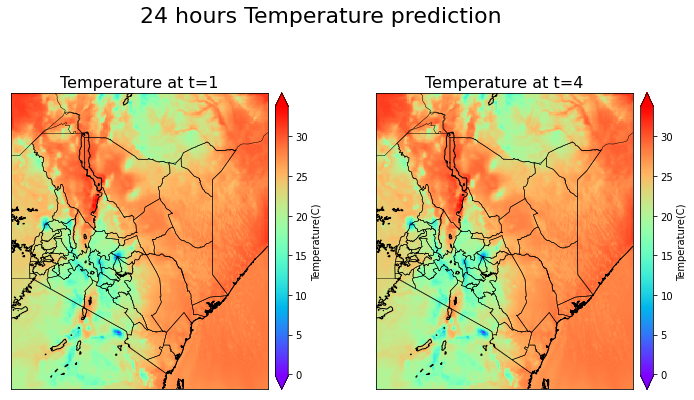

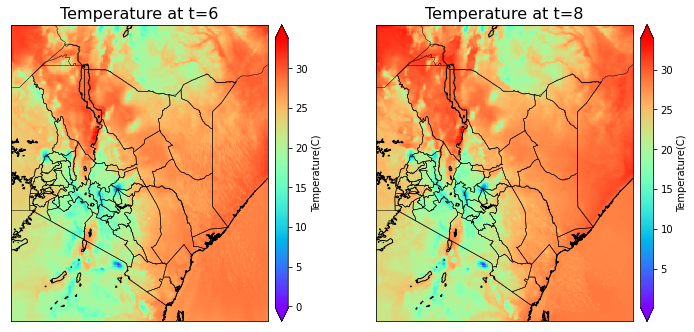

In [5]:
fig=plt.figure(1,figsize=(12,12))
fig.suptitle("24 hours Temperature prediction",fontsize=22)
plt.subplot(221)
plot_nc_2(1)
plt.title('Temperature at t=1',fontsize=16)

plt.subplot(222)
plot_nc_2(4)
plt.title('Temperature at t=4',fontsize=16)

plt.figure(2,figsize=(12,12))
plt.subplot(221)
plot_nc_2(6)
plt.title('Temperature at t=6',fontsize=16)

plt.subplot(222)
plot_nc_2(8)
plt.title('Temperature at t=8',fontsize=16)
plt.show
plt.savefig('temperature.jpg',dpi=300) #saves the image generated